# Oakland Police Use of Force 

This workbooks look into police incident data for Oakland Police Department from 2010 to 2021 May. Original request and raw data can be found [here](https://oaklandca.nextrequest.com/requests/21-3322)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
use_of_force = pd.read_csv('./data/incidents_2010_2021.csv', parse_dates=['IncidentDate'])

In [3]:
use_of_force.head()

,UoFKey,UoFNumber,RDNumber,IncidentDate,Location,Beat,Officer Identifier,SubjectKey,SubjAgeatTOI,SubjRace,SubjGender,ForceLevel,ForceType,Description
0,1199,10F-0001,10-000285,2010-01-02 13:20:00,700 Adeline Street,NaN,2958,4011,29,Black,Male,Level 3,11,"If Taser® Probes Impact Clothing, Penetrates S..."
1,1199,10F-0001,10-000285,2010-01-02 13:20:00,700 Adeline Street,NaN,2896,4011,29,Black,Male,Level 3,16,Weaponless Defense Technique Other than for Co...
2,1199,10F-0001,10-000285,2010-01-02 13:20:00,700 Adeline Street,NaN,2896,4011,29,Black,Male,Level 4,25,Weaponless Control Technique Control Hold with...
3,1200,10F-0002,10-000666,2010-01-04 04:50:00,1400 E 31st Street,NaN,2962,4012,25,Black,Male,Level 4,25,Weaponless Control Technique Control Hold with...
4,1211,10F-0073,10-003487,2010-01-05 17:35:00,100th Ave & MacArthur Blvd,NaN,2755,4062,38,Black,Male,Level 3,11,"If Taser® Probes Impact Clothing, Penetrates S..."


In [4]:
use_of_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20062 entries, 0 to 20061
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   UoFKey              20062 non-null  int64         
 1   UoFNumber           20062 non-null  object        
 2   RDNumber            20060 non-null  object        
 3   IncidentDate        20062 non-null  datetime64[ns]
 4   Location            20062 non-null  object        
 5   Beat                6077 non-null   object        
 6   Officer Identifier  20062 non-null  int64         
 7   SubjectKey          20062 non-null  int64         
 8   SubjAgeatTOI        20062 non-null  object        
 9   SubjRace            20062 non-null  object        
 10  SubjGender          19777 non-null  object        
 11  ForceLevel          20062 non-null  object        
 12  ForceType           20055 non-null  object        
 13  Description         20061 non-null  object    

In [5]:
use_of_force['year'] = use_of_force['IncidentDate'].dt.year

In [6]:
uof_df = use_of_force.groupby(['year', 'ForceLevel'])['RDNumber'].count()
uof_df = uof_df.reset_index()
uof_df = uof_df.rename(columns={'RDNumber': 'count'})
uof_df.head()

,year,ForceLevel,count
0,2010,Level 1,13
1,2010,Level 2,96
2,2010,Level 3,256
3,2010,Level 4,379
4,2011,Level 1,17


In [7]:
check = use_of_force.query("year==2014 & ForceLevel =='Level 1'")
check.head()

,UoFKey,UoFNumber,RDNumber,IncidentDate,Location,Beat,Officer Identifier,SubjectKey,SubjAgeatTOI,SubjRace,SubjGender,ForceLevel,ForceType,Description,year


In [8]:
uof_pivot = uof_df.pivot(index='year', columns='ForceLevel', values='count').fillna(0)
uof_pivot = uof_pivot.reset_index()
uof_pivot

ForceLevel,year,Level 1,Level 2,Level 3,Level 4
0,2010,13.0,96.0,256.0,379.0
1,2011,17.0,107.0,283.0,255.0
2,2012,7.0,81.0,175.0,5898.0
3,2013,7.0,36.0,101.0,2438.0
4,2014,0.0,10.0,62.0,1547.0
5,2015,13.0,19.0,67.0,1025.0
6,2016,0.0,25.0,97.0,689.0
7,2017,2.0,27.0,118.0,420.0
8,2018,4.0,37.0,84.0,538.0
9,2019,1.0,26.0,114.0,1408.0


In [14]:
uof_pivot.to_csv('./data/incidents_oak.csv')

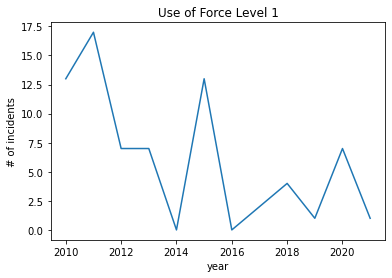

In [9]:
sns.lineplot(x='year', y='Level 1', data=uof_pivot, markers=True)
plt.title('Use of Force Level 1')
plt.ylabel('# of incidents')

plt.savefig('./graph/level_1.png')
plt.show()

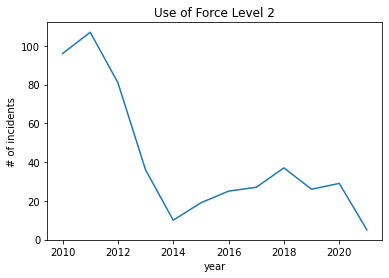

In [10]:
sns.lineplot(x='year', y='Level 2', data=uof_pivot, markers=True)
plt.title('Use of Force Level 2')
plt.ylabel('# of incidents')

plt.savefig('./graph/level_2.png')
plt.show()

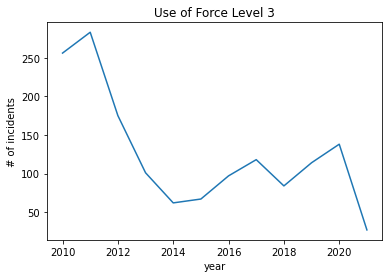

In [11]:
sns.lineplot(x='year', y='Level 3', data=uof_pivot, markers=True)
plt.title('Use of Force Level 3')
plt.ylabel('# of incidents')

plt.savefig('./graph/level_3.png')
plt.show()

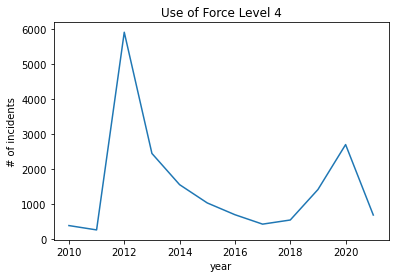

In [12]:
sns.lineplot(x='year', y='Level 4', data=uof_pivot, markers=True)
plt.title('Use of Force Level 4')
plt.ylabel('# of incidents')

plt.savefig('./graph/level_4.png')
plt.show()